# Install req

In [4]:
!pip install nuscenes-devkit

In [9]:
# code from nuscenes tutorial on official website, fuck gpt im not using that mf
!mkdir -p /data/sets/nuscenes  # Make the directory to store the nuScenes dataset in.

!wget https://www.nuscenes.org/data/v1.0-mini.tgz  # Download the nuScenes mini split.

!tar -xf v1.0-mini.tgz -C /data/sets/nuscenes  # Uncompress the nuScenes mini split.

!pip install nuscenes-devkit &> /dev/null  # Install nuScenes.

--2025-06-07 15:17:11--  https://www.nuscenes.org/data/v1.0-mini.tgz
Resolving www.nuscenes.org (www.nuscenes.org)... 3.169.55.57, 3.169.55.103, 3.169.55.122, ...
Connecting to www.nuscenes.org (www.nuscenes.org)|3.169.55.57|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4167696325 (3.9G) [application/x-tar]
Saving to: ‘v1.0-mini.tgz’

v1.0-mini.tgz       100%[===================>]   3.88G  84.2MB/s    in 55s     

2025-06-07 15:18:06 (72.6 MB/s) - ‘v1.0-mini.tgz’ saved [4167696325/4167696325]



In [7]:
from nuscenes.nuscenes import NuScenes

nusc = NuScenes(version='v1.0-mini', dataroot='/data/sets/nuscenes', verbose=True)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.837 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


# playing around with nuscenes

In [11]:
sample = nusc.sample[0]
ego_pose_token = nusc.get('sample_data', sample['data']['LIDAR_TOP'])['ego_pose_token']
ego_pose = nusc.get('ego_pose', ego_pose_token)
print("Ego Pose:", ego_pose)

Ego Pose: {'token': '9d9bf11fb0e144c8b446d54a8a00184f', 'timestamp': 1532402927647951, 'rotation': [0.5720320396729045, -0.0016977771610471074, 0.011798001930183783, -0.8201446642457809], 'translation': [411.3039349319818, 1180.8903791765097, 0.0]}


In [12]:
for ann_token in sample['anns']:
    ann = nusc.get('sample_annotation', ann_token)
    print("Agent Category:", ann['category_name'], "Token:", ann['token'])

Agent Category: human.pedestrian.adult Token: ef63a697930c4b20a6b9791f423351da
Agent Category: human.pedestrian.adult Token: 6b89da9bf1f84fd6a5fbe1c3b236f809
Agent Category: vehicle.car Token: 924ee6ac1fed440a9d9e3720aac635a0
Agent Category: human.pedestrian.adult Token: 91e3608f55174a319246f361690906ba
Agent Category: movable_object.trafficcone Token: cd051723ed9c40f692b9266359f547af
Agent Category: vehicle.bicycle Token: 36d52dfedd764b27863375543c965376
Agent Category: human.pedestrian.adult Token: 70af124fceeb433ea73a79537e4bea9e
Agent Category: vehicle.car Token: 63b89fe17f3e41ecbe28337e0e35db8e
Agent Category: human.pedestrian.adult Token: e4a3582721c34f528e3367f0bda9485d
Agent Category: movable_object.barrier Token: fcb2332977ed4203aa4b7e04a538e309
Agent Category: movable_object.barrier Token: a0cac1c12246451684116067ae2611f6
Agent Category: human.pedestrian.adult Token: 02248ff567e3497c957c369dc9a1bd5c
Agent Category: human.pedestrian.adult Token: 9db977e264964c2887db1e37113cdda

In [30]:
!mkdir /data/sets/nuscenes_map_expansion
!wget https://d36yt3mvayqw5m.cloudfront.net/public/v1.0/nuScenes-map-expansion-v1.3.zip
!unzip nuScenes-map-expansion-v1.3.zip -d /data/sets/nuscenes_map_expansion
!mkdir /data/sets/nuscenes/maps/expansion
!cp -r /data/sets/nuscenes_map_expansion/expansion/* /data/sets/nuscenes/maps/expansion

In [49]:
!pip install numpy==1.26.4

In [55]:
!which numpy

In [1]:
import matplotlib.pyplot as plt
import tqdm
import numpy as np

from nuscenes.map_expansion.map_api import NuScenesMap
from nuscenes.map_expansion import arcline_path_utils
from nuscenes.map_expansion.bitmap import BitMap

nusc_map = NuScenesMap(dataroot='/data/sets/nuscenes')

/usr/local/lib/python3.11/dist-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/local/lib/python3.11/dist-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/local/lib/python3.11/dist-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/usr/local/lib/python3.11/dist-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/local/lib/python3.11/d

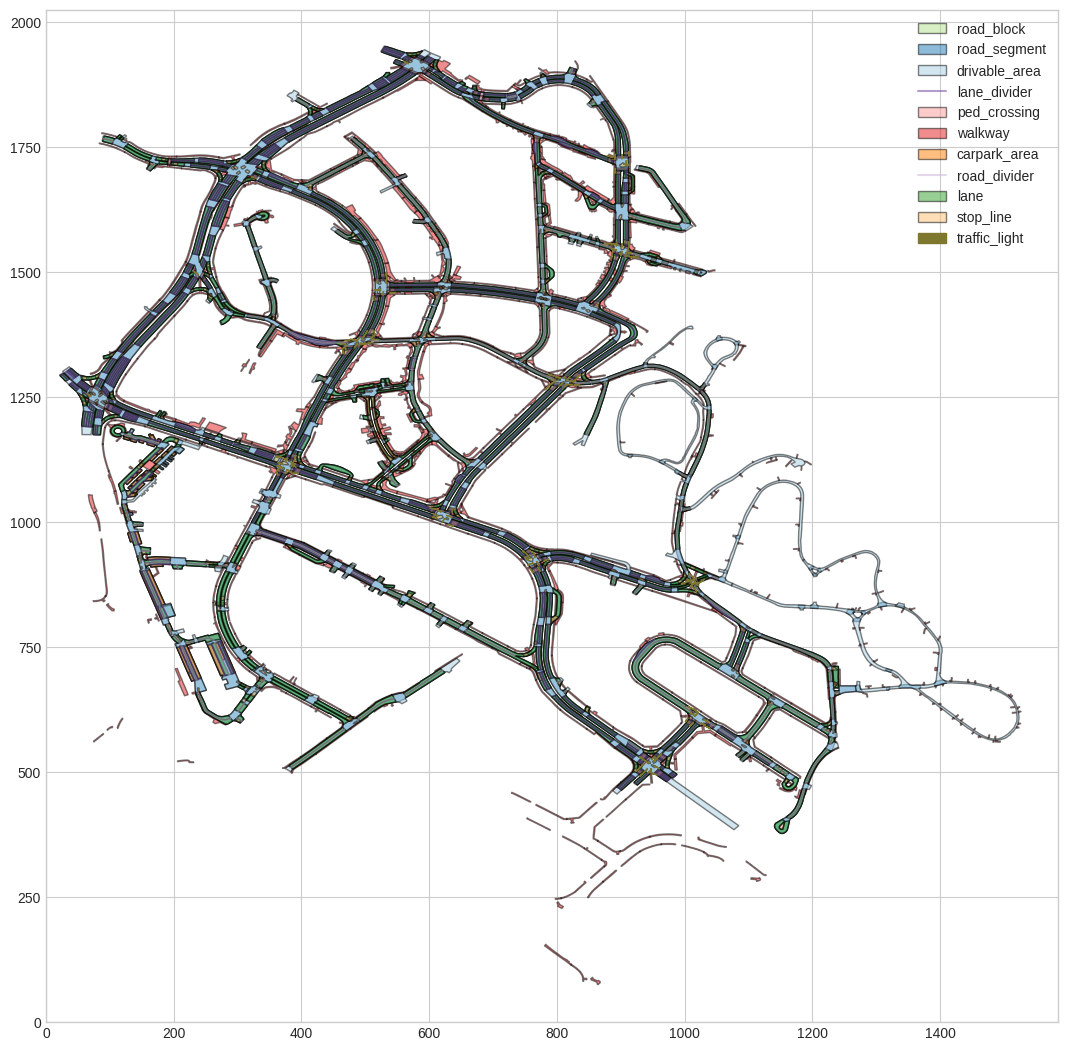

In [4]:
fig, ax = nusc_map.render_layers(nusc_map.non_geometric_layers, figsize=1)

/usr/local/lib/python3.11/dist-packages/nuscenes/map_expansion/map_api.py:1823: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  exteriors = [int_coords(poly.exterior.coords) for poly in polygons]
/usr/local/lib/python3.11/dist-packages/nuscenes/map_expansion/map_api.py:1824: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  interiors = [int_coords(pi.coords) for poly in polygons for pi in poly.interiors]


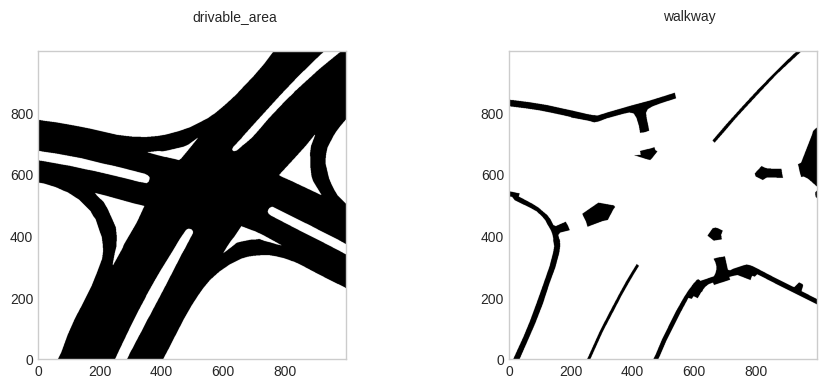

In [3]:
patch_box = (300, 1700, 100, 100)
patch_angle = 0  # Default orientation where North is up
layer_names = ['drivable_area', 'walkway']
canvas_size = (1000, 1000)
map_mask = nusc_map.get_map_mask(patch_box, patch_angle, layer_names, canvas_size)
map_mask[0]
figsize = (12, 4)
fig, ax = nusc_map.render_map_mask(patch_box, patch_angle, layer_names, canvas_size, figsize=figsize, n_row=1)

# extract BEV from LiDAR

In [9]:
from nuscenes.nuscenes import NuScenes
from nuscenes.utils.data_classes import LidarPointCloud
from nuscenes.utils.geometry_utils import transform_matrix
import numpy as np
import cv2

def render_bev(nusc, sample_token):
    sample = nusc.get('sample', sample_token)
    sd_record = nusc.get('sample_data', sample['data']['LIDAR_TOP'])
    pc = LidarPointCloud.from_file(nusc.get_sample_data_path(sd_record['token']))
    # Project to BEV and rasterize into an image
    points = pc.points[:2, :]  # X, Y only
    # Convert to BEV image (dummy example)
    bev_img = np.zeros((512, 512), dtype=np.uint8)
    for x, y in zip(points[0], points[1]):
        x_img = int((x + 50) * 5)  # scale and shift
        y_img = int((y + 50) * 5)
        if 0 <= x_img < 512 and 0 <= y_img < 512:
            bev_img[y_img, x_img] = 255
    return bev_img

In [26]:
cam_data = nusc.get('sample_data', nusc.sample[150]['data']['CAM_FRONT'])

sample_token = cam_data['sample_token']

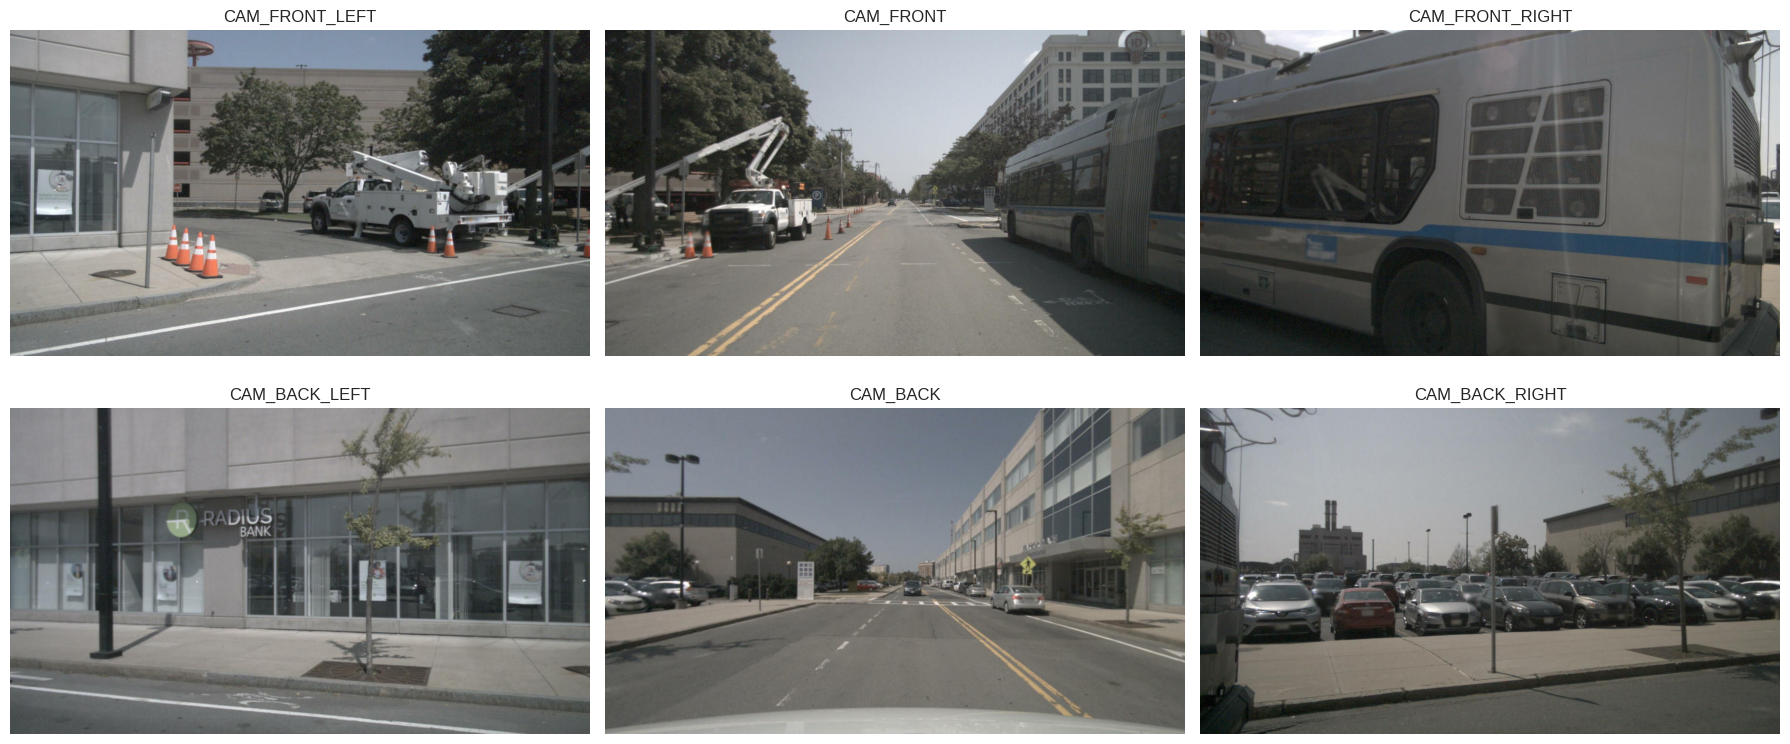

In [27]:
import matplotlib.pyplot as plt
from PIL import Image

def show_all_camera_images(nusc, sample_token):
    camera_channels = [
        'CAM_FRONT_LEFT',
        'CAM_FRONT',
        'CAM_FRONT_RIGHT',
        'CAM_BACK_LEFT',
        'CAM_BACK',
        'CAM_BACK_RIGHT'
    ]

    sample = nusc.get('sample', sample_token)

    plt.figure(figsize=(18, 8))

    for i, cam in enumerate(camera_channels):
        cam_token = sample['data'][cam]
        cam_data = nusc.get('sample_data', cam_token)
        img_path = nusc.get_sample_data_path(cam_token)
        img = Image.open(img_path)

        plt.subplot(2, 3, i + 1)
        plt.imshow(img)
        plt.title(cam)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

show_all_camera_images(nusc, sample_token)

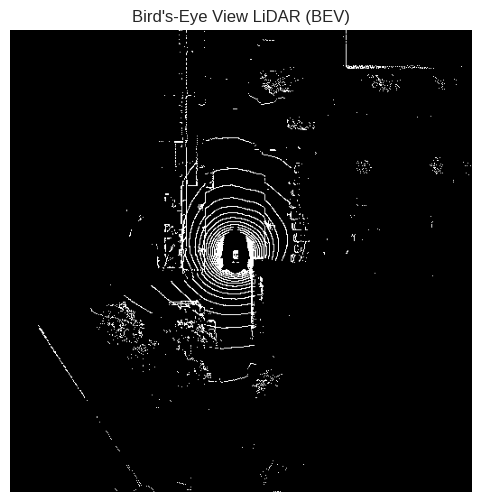

In [29]:
import matplotlib.pyplot as plt

bev_img = render_bev(nusc, sample_token)

plt.figure(figsize=(6, 6))
plt.imshow(bev_img, cmap='gray')
plt.title("Bird's-Eye View LiDAR (BEV)")
plt.axis('off')
plt.show()

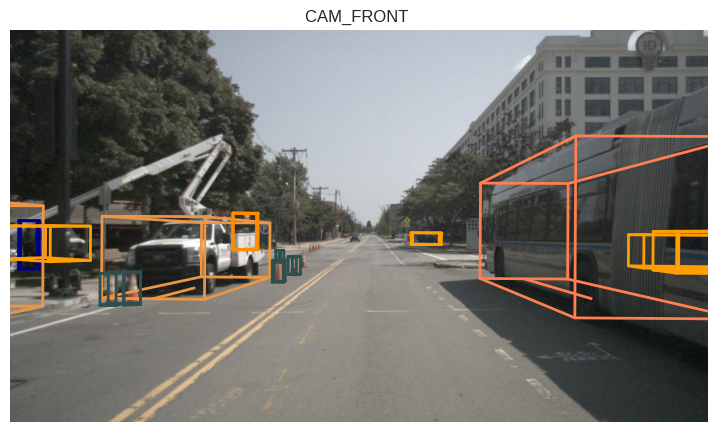

In [31]:
sensor = 'CAM_FRONT'
my_sample=nusc.get('sample', sample_token)
cam_front_data = nusc.get('sample_data', my_sample['data'][sensor])
nusc.render_sample_data(cam_front_data['token'])

# Q-Former